<a href="https://www.kaggle.com/code/martaseidler/reason-for-playing-video-games?scriptVersionId=161972329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set2")

In [2]:
df = pd.read_csv('/kaggle/input/video-games-playing-reason/VideoGameUsage_Profile.csv')

## A quick look at the Data

In [3]:
df.head()

,Age,Gender,student,play_video_game,favorite_game,most_played_game,reason_of_play_game
0,22,Male,Yes,Yes,FIFA 22,FIFA 22,competition
1,21,Male,Yes,Yes,Call of Duty,Call of Duty,entertainment
2,23,Male,Yes,Yes,GTA Vice City,GTA Vice City,entertainment
3,23,Male,Yes,sometimes,pubg,pubg,entertainment
4,23,Male,Yes,Yes,pubg,pubg,entertainment


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  99 non-null     int64 
 1   Gender               99 non-null     object
 2   student              99 non-null     object
 3   play_video_game      99 non-null     object
 4   favorite_game        99 non-null     object
 5   most_played_game     99 non-null     object
 6   reason_of_play_game  99 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.5+ KB


In [5]:
df.describe(include='all')

,Age,Gender,student,play_video_game,favorite_game,most_played_game,reason_of_play_game
count,99.000000,99,99,99,99,99,99
unique,NaN,2,2,3,15,16,5
top,NaN,Male,Yes,Yes,Minecraft,Minecraft,entertainment
freq,NaN,92,89,76,25,25,85
mean,23.303030,NaN,NaN,NaN,NaN,NaN,NaN
std,1.281378,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,24.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Gender'].value_counts()

Gender
Male     92
Femal     7
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Femal', 'Female')

In [8]:
df['favorite_game'].unique()

array(['FIFA 22', 'Call of Duty', 'GTA Vice City', 'pubg', 'Minecraft',
       'Apex Legends', 'Rocket League', 'Animal Crossing', 'Among Us',
       'The Sims', 'Stardew Valley', 'League of Legends', 'Mario Kart',
       'World of Warcraft', 'Fortnite'], dtype=object)

In [9]:
df['most_played_game'].unique()

array(['FIFA 22 ', 'Call of Duty', 'GTA Vice City', 'pubg', 'Minecraft',
       'FIFA 22', 'Apex Legends', 'Rocket League', 'Animal Crossing',
       'Among Us', 'The Sims', 'Stardew Valley', 'League of Legends',
       'Mario Kart', 'World of Warcraft', 'Fortnite'], dtype=object)

In [10]:
df['most_played_game'] = df['most_played_game'].replace('FIFA 22 ', 'FIFA 22')

## Data Visualization

In [11]:
age_grouped = df.groupby('Age').size().sort_values(ascending=False)
gender_grouped = df.groupby('Gender').size().sort_values(ascending=False)
student_grouped = df.groupby('student').size().sort_values(ascending=False)
gamer_grouped = df.groupby('play_video_game').size().sort_values(ascending=False)
reason_group = df.groupby('reason_of_play_game').size().sort_values(ascending=False)

Text(0.5, 1.0, 'Is the respondent a student?')

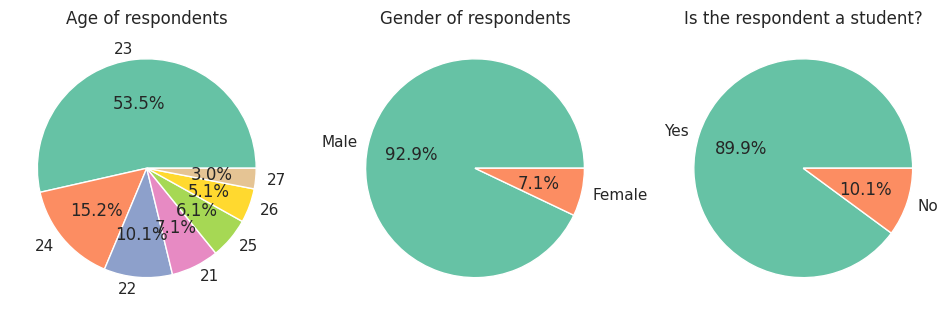

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].pie(age_grouped, labels=age_grouped.index, autopct='%1.1f%%')
axes[0].set_title('Age of respondents')

axes[1].pie(gender_grouped, labels=gender_grouped.index, autopct='%1.1f%%')
axes[1].set_title('Gender of respondents')

axes[2].pie(student_grouped, labels=student_grouped.index, autopct='%1.1f%%')
axes[2].set_title('Is the respondent a student?')

Text(0.5, 1.0, 'Reason for playing')

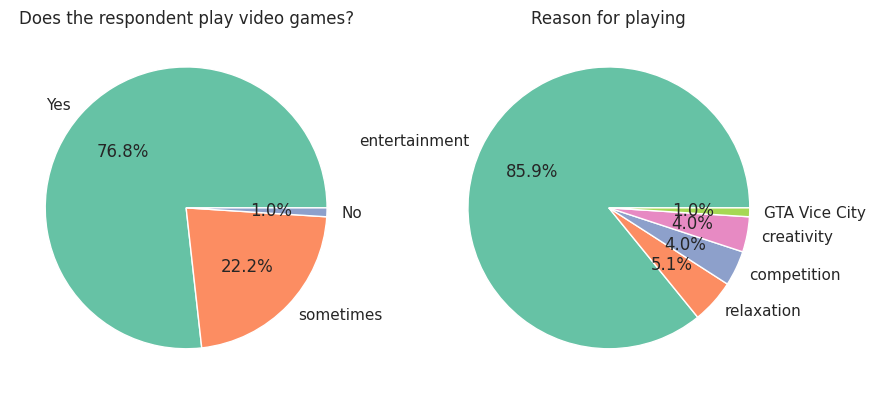

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(gamer_grouped, labels=gamer_grouped.index, autopct='%1.1f%%')
axes[0].set_title('Does the respondent play video games?')

axes[1].pie(reason_group, labels=reason_group.index, autopct='%1.1f%%')
axes[1].set_title('Reason for playing')

In [14]:
favourite_games_group = df.groupby('favorite_game').size().sort_values(ascending=False)
most_played_games_group = df.groupby('most_played_game').size().sort_values(ascending=False)

Text(0.5, 1.0, 'Most played game')

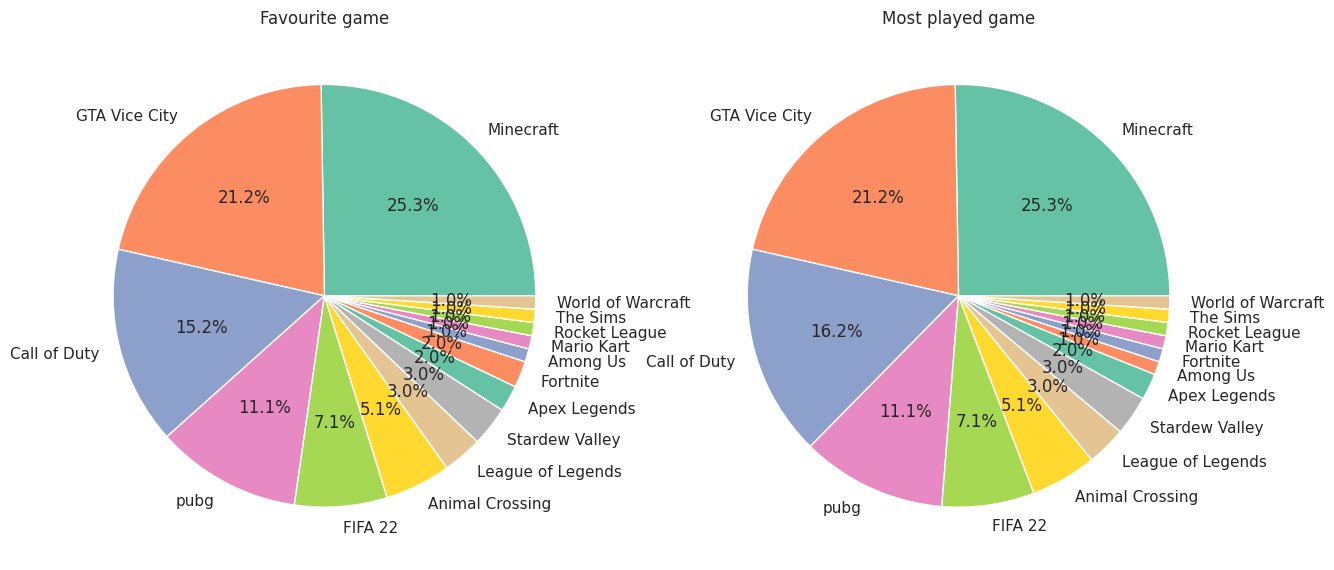

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].pie(favourite_games_group, labels=favourite_games_group.index, autopct='%1.1f%%')
axes[0].set_title('Favourite game')

axes[1].pie(most_played_games_group, labels=most_played_games_group.index, autopct='%1.1f%%')
axes[1].set_title('Most played game')

<Axes: xlabel='Age', ylabel='most_played_game'>

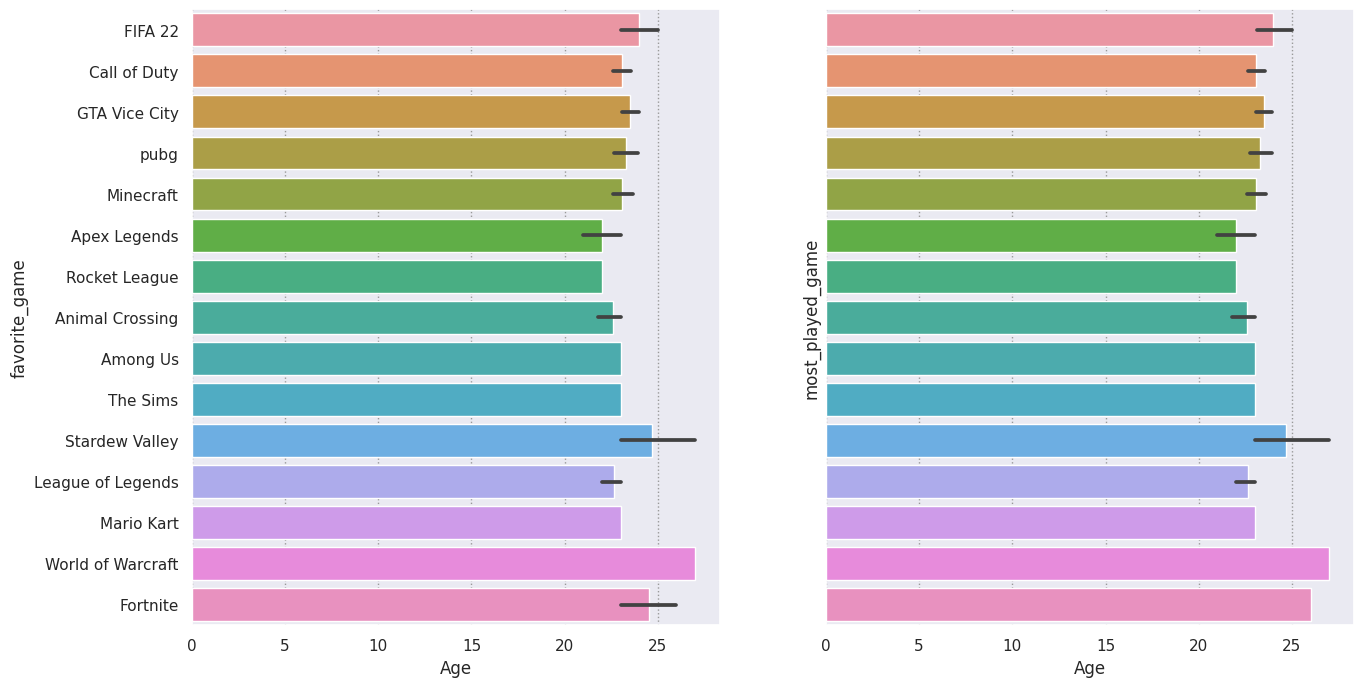

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

sns.barplot(data=df, y='favorite_game', x='Age', orient='h', ax=axes[0])
sns.barplot(data=df, y='most_played_game', x='Age', orient='h', ax=axes[1])

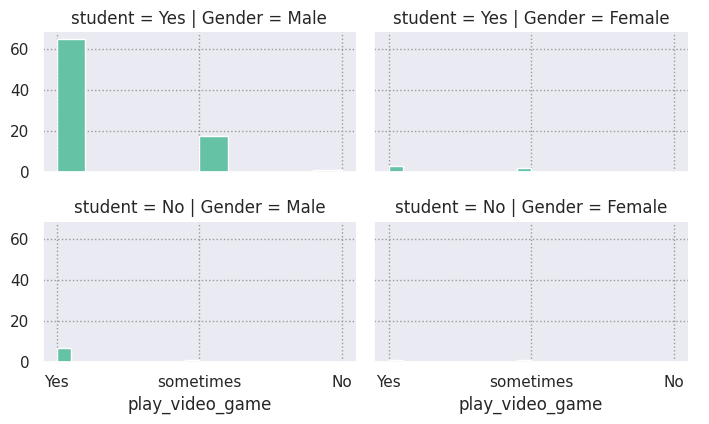

In [17]:
grid = sns.FacetGrid(df, col='Gender', row='student', height=2.2, aspect=1.6)
grid.map(plt.hist, 'play_video_game', bins=10)
grid.add_legend()